In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 30.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=89a515d5cac3ab8eeff8500498121ef1c76b6c1da640dec2c7e3099725f0efd1
  Stored in directory: /Users/dhanushkikkisetti/Library/Caches/pip/wheels/01/02/ee/df0699282986903a384b69aab4413af9efd26b3612b5dccc9e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3514 sha256=8f56e4045ddeb0506374e91a4d1e71d9eec40e5a2753147001cf254fca2f88ce
  Stored in directory: /Users/dhanushkikkisetti/Library/Caches/pip/wheels/43/aa/48/5c66b931ff013ad19774081aa19656637af5c0cc33b5494b30
Successfully built fst-pso miniful


In [1]:
import gensim
import pandas as pd
import numpy as np
from datetime import datetime
import re
import string
import nltk
from nltk.corpus import stopwords;
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize;
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk import pos_tag
from nltk.util import ngrams
import collections
import spacy
from gensim.models import Word2Vec, KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/antisemitism/Old datasets (not updated)/antisemitism_combined.csv")
data=data[['text','classification']]
data=data.dropna()
#data['Antisemitism']=data['Antisemitic (Y/N)'].map({'Y':1,'N':0})
#data['Antisemitic (Y/N)'].replace(['Y','N'],[1,0],inplace=True)
#data.rename(columns={"Social media post (text)":"Text"},inplace=True)
#data=data[['Text','Antisemitism']]
text=(data['text'][data['classification']==1])
text.shape

(338,)

In [3]:
#[data['text'] if data['Antisemitism']==1]
#text=(data['Text'][data['Antisemitism']==1])
def bigstring(text):
    new=[]
    for i in text:
        if len(i)<10:
            new.append(i)
    return new
def remove_stopwords(text):
    stopword=set(stopwords.words('english'))
    modified_text=[]
    for i in text:
        if i not in stopword:
            modified_text.append(i)
    return modified_text

In [4]:
#Converting into lowercase
text=text.apply(lambda x:x.lower())
# Removing punctuation
text=text.apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
text=text.apply(lambda x:re.sub('\d','',x))
text=text.apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))
text=text.apply(lambda x:word_tokenize(x))
text=text.apply(lambda x:bigstring(x))
text=text.apply(lambda x:remove_stopwords(x))
text

1       [think, pro, zionist, amos, oz, supporter, par...
2       [im, probably, due, years, zog, cant, help, th...
3       [latest, proof, trump, managed, appeal, think,...
4       [holiness, would, like, inform, building, bish...
6       [poll, shows, arab, areas, around, peoples, ag...
                              ...                        
1200    [planning, going, simchat, torah, sole, purpos...
1204    [live, near, boarder, rockland, county, palest...
1208    [yashaya, messiah, hebrews, evident, lord, spr...
1212    [high, priests, didnt, go, inside, think, knew...
1220                              [time, stop, blairites]
Name: text, Length: 338, dtype: object

In [5]:
model=Word2Vec(text,window=2,min_count=1,vector_size=200,sg=1)

In [6]:
print(model)

Word2Vec<vocab=2282, vector_size=200, alpha=0.025>


In [7]:
#model.train(text,total_examples=model.corpus_count,epochs=5)

In [8]:
model.wv['zionist']

array([ 4.2202020e-05, -2.0107142e-04,  3.2172084e-03,  5.6670224e-03,
       -3.3358952e-03, -4.6577370e-03,  3.1848918e-03,  6.7278147e-03,
       -3.7746758e-03, -1.6340791e-03,  2.8232881e-03, -1.6811197e-03,
       -1.9607758e-03,  3.9841193e-03, -3.1478365e-03, -1.4668127e-03,
        6.2327803e-04, -2.5149176e-04, -3.6443130e-03, -7.5237546e-03,
        4.9811709e-03,  1.7987883e-03,  3.8804261e-03,  4.6833314e-04,
        3.0478763e-03, -2.4942409e-03, -2.2667636e-04,  1.9273643e-03,
       -5.8108498e-03, -2.2085963e-03, -3.3725505e-03, -6.1750726e-04,
        4.7441316e-03, -4.2441227e-03, -4.0106228e-04, -5.3181648e-05,
        4.3514203e-03, -2.8719369e-03, -2.7807656e-04, -3.8817264e-03,
       -6.0723987e-03,  2.3902559e-03, -4.7410973e-03, -1.0814015e-03,
        1.6201583e-03, -5.0067803e-04, -4.5500337e-03,  4.9023852e-03,
        2.9278798e-03,  5.6073987e-03, -2.9556567e-03,  1.8428047e-03,
       -2.7197071e-03, -7.4735621e-04,  4.5696148e-03, -3.0075449e-03,
      

In [9]:
list(model.wv.key_to_index)

['zionist',
 'jews',
 'israel',
 'zionists',
 'amp',
 'jewish',
 'zog',
 'jew',
 'like',
 'us',
 'people',
 'think',
 'know',
 'rabbi',
 'one',
 'dont',
 'get',
 'even',
 'media',
 'would',
 'want',
 'black',
 'look',
 'also',
 'palestine',
 'jesus',
 'apartheid',
 'world',
 'trump',
 'going',
 'god',
 'make',
 'state',
 'time',
 'control',
 'white',
 'good',
 'torah',
 'bds',
 'arab',
 'way',
 'american',
 'right',
 'hebrew',
 'hitler',
 'back',
 'never',
 'believe',
 'says',
 'knew',
 'land',
 'got',
 'america',
 'war',
 'cant',
 'take',
 'im',
 'terrorist',
 'slave',
 'long',
 'usa',
 'today',
 'story',
 'still',
 'israeli',
 'literally',
 'everyone',
 'russia',
 'messiah',
 'talk',
 'didnt',
 'person',
 'doesnt',
 'ever',
 'yet',
 'tell',
 'real',
 'hate',
 'years',
 'call',
 'really',
 'power',
 'united',
 'man',
 'gt',
 'support',
 'party',
 'always',
 'states',
 'every',
 'say',
 'thing',
 'since',
 'behind',
 'racist',
 'muslims',
 'holocaust',
 'well',
 'coming',
 'money',
 'g

In [10]:
model.wv.most_similar('zog')

[('zionist', 0.2337605059146881),
 ('month', 0.2317037731409073),
 ('youd', 0.21662414073944092),
 ('tl', 0.206393763422966),
 ('inward', 0.2049041986465454),
 ('witty', 0.20281274616718292),
 ('kinds', 0.2014664113521576),
 ('get', 0.2010621577501297),
 ('british', 0.19744598865509033),
 ('banks', 0.19594253599643707)]

 ## Visualize Word Embedding Using TSNE/PCA

In [13]:
x=model.wv[model.wv.key_to_index]
pca=PCA(n_components=2)
results=pca.fit_transform(x)


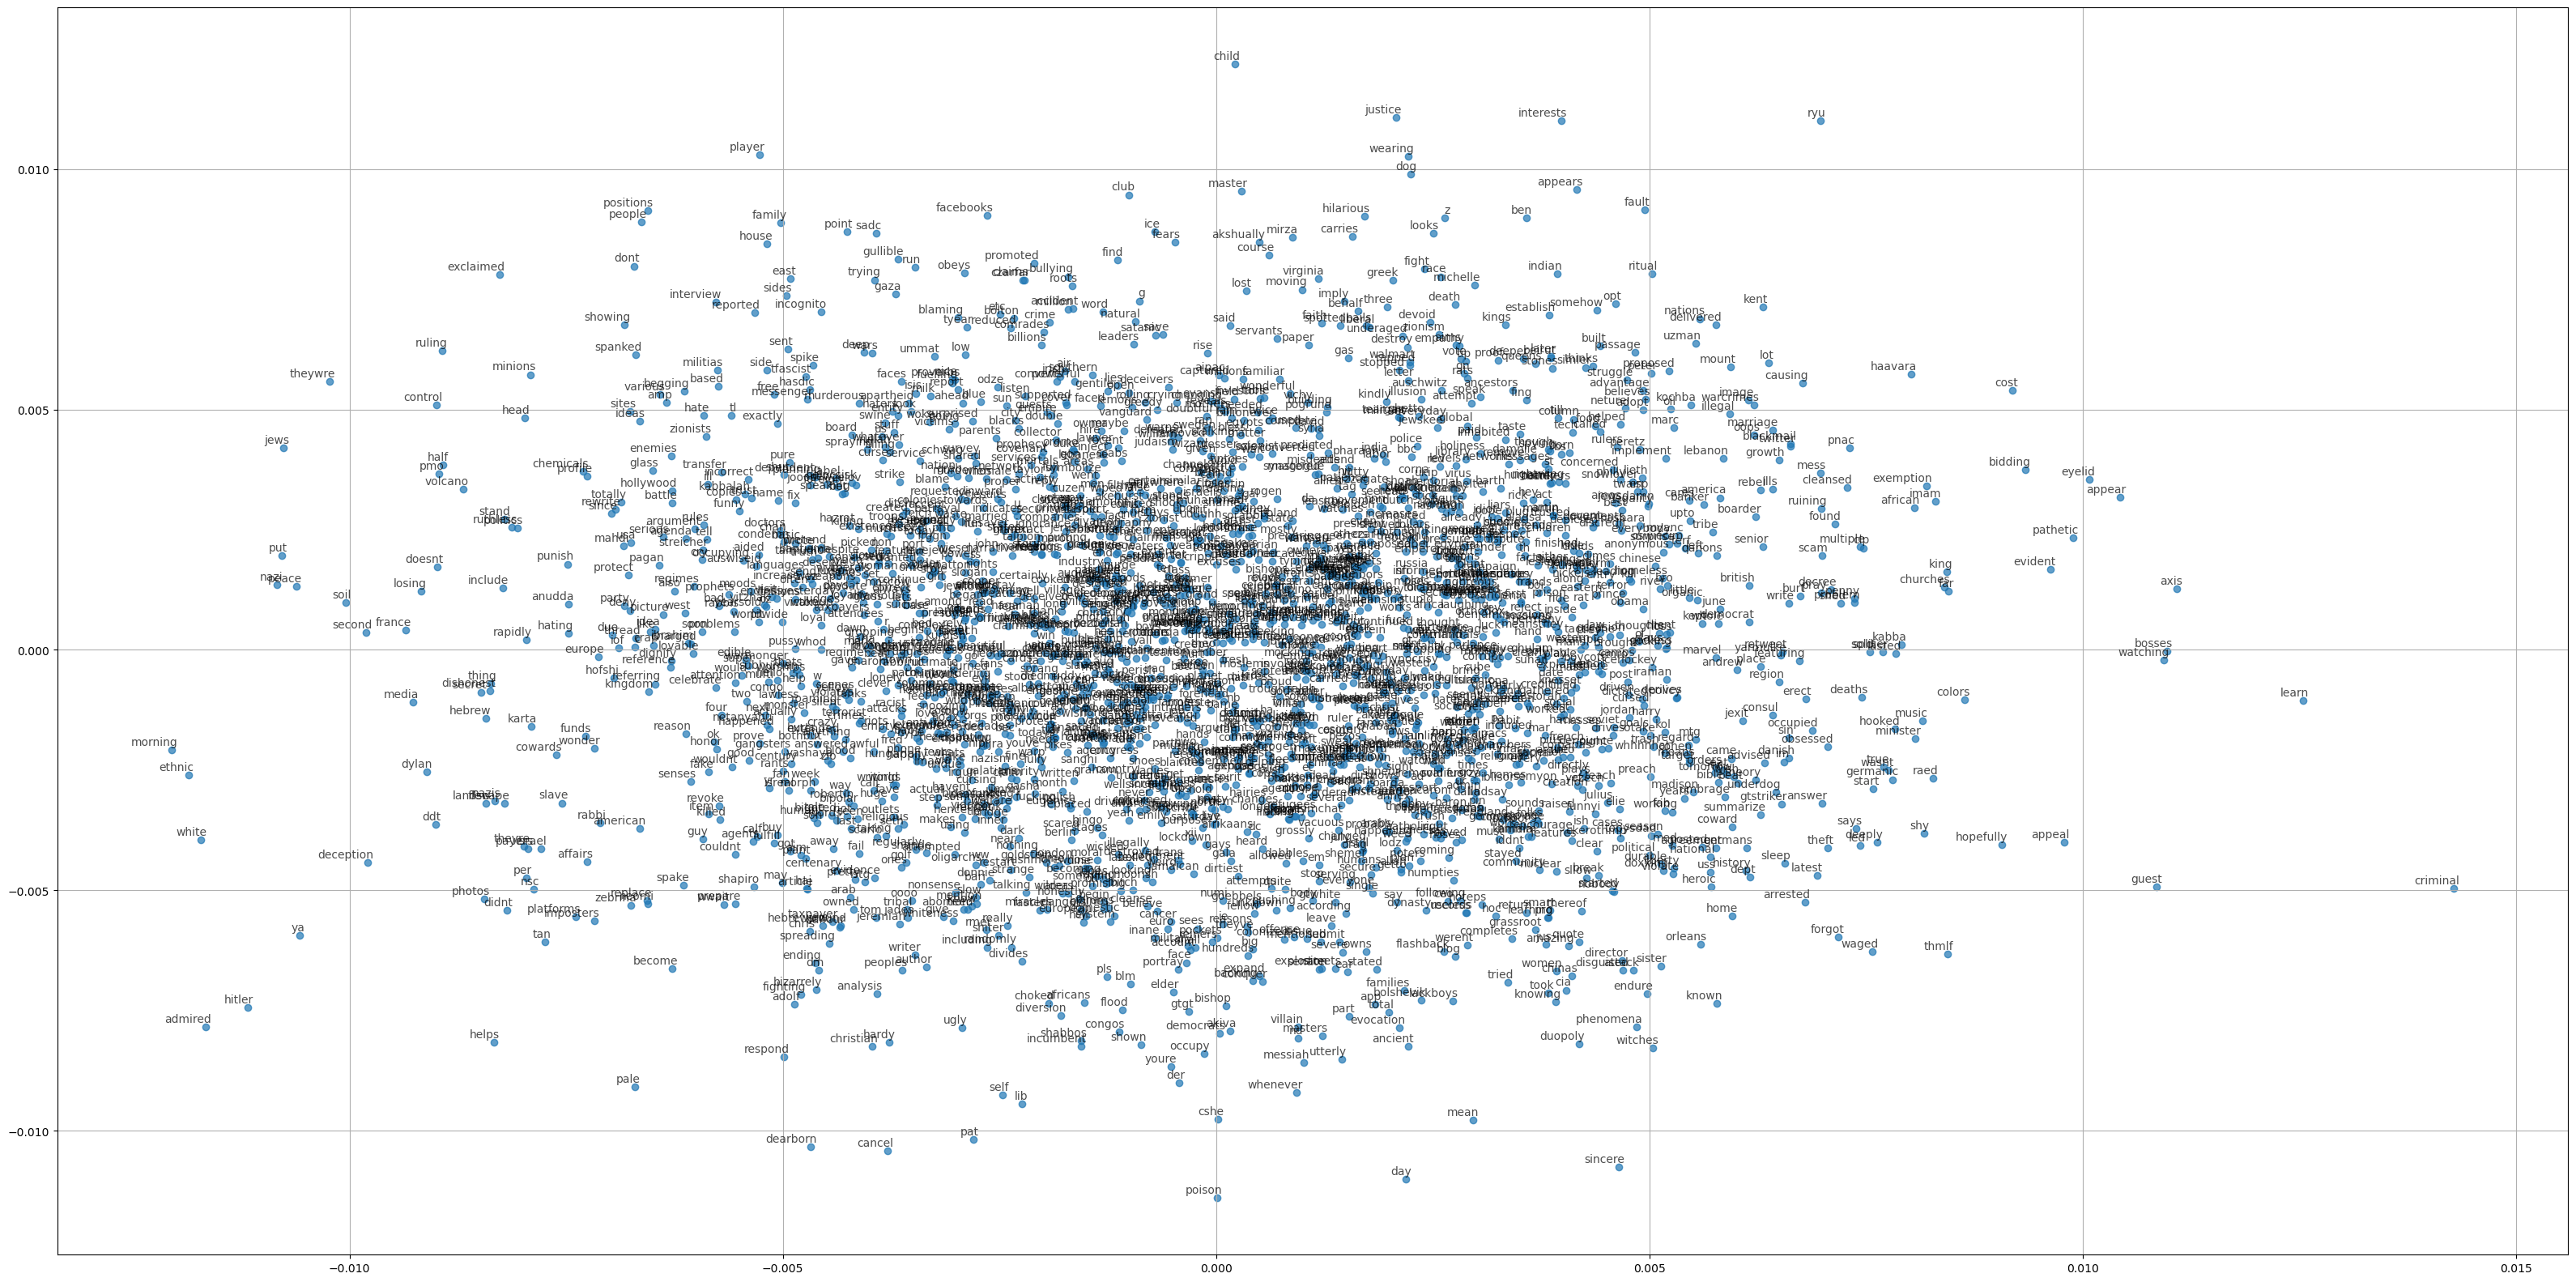

In [14]:
plt.figure(figsize=(40,20))
plt.scatter(results[:,0],results[:,1],alpha=0.7)
words=model.wv.index_to_key
for i,word in enumerate(words):
    plt.annotate(word, alpha=0.7, xy=(results[i, 0], results[i, 1]), xytext=(5, 2),
                textcoords='offset points', ha='right', va='bottom', size=10)

plt.grid(True)
plt.show()